<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python43_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = {
    'city': ['서울', '서울', '서울', '경기', '경기', '경기'],
    'year': [2018, 2019, 2020, 2018, 2019, 2020],
    'pop': [1.1, 1.2, 1.3, 1.5, 1.6, 1.4]
}
print(data)

{'city': ['서울', '서울', '서울', '경기', '경기', '경기'], 'year': [2018, 2019, 2020, 2018, 2019, 2020], 'pop': [1.1, 1.2, 1.3, 1.5, 1.6, 1.4]}


In [3]:
df = pd.DataFrame(data)
print(df)

  city  year  pop
0   서울  2018  1.1
1   서울  2019  1.2
2   서울  2020  1.3
3   경기  2018  1.5
4   경기  2019  1.6
5   경기  2020  1.4


In [4]:
df  # Jupyter Notebook은 데이터 프레임을 표 형식으로 출력해줌.

,city,year,pop
0,서울,2018,1.1
1,서울,2019,1.2
2,서울,2020,1.3
3,경기,2018,1.5
4,경기,2019,1.6
5,경기,2020,1.4


In [7]:
# DataFrame 객체의 속성들(attributes)
print('shape:', df.shape)  #> (row 개수, column 개수)
print('index:', df.index)  #> (row) 인덱스
print('columns:', df.columns)  #> column 이름들의 리스트

shape: (6, 3)
index: RangeIndex(start=0, stop=6, step=1)
columns: Index(['city', 'year', 'pop'], dtype='object')


In [12]:
# DataFrame에서 컬럼 선택 -> pd.Series
df['city']  # dictionary-like 방법

0    서울
1    서울
2    서울
3    경기
4    경기
5    경기
Name: city, dtype: object

In [13]:
df.city  # attribute-like 방법

0    서울
1    서울
2    서울
3    경기
4    경기
5    경기
Name: city, dtype: object

In [18]:
df.pop

<bound method NDFrame.pop of   city  year  pop
0   서울  2018  1.1
1   서울  2019  1.2
2   서울  2020  1.3
3   경기  2018  1.5
4   경기  2019  1.6
5   경기  2020  1.4>

DataFrame에서 컬럼 선택 방법:
* dictionary-like 방법: df['column_name']
* attribute-like 방법: df.column_name
* dictionary-like 방법은 항상 가능!
* attribute-like 방법은 안되는 경우도 있음!
  * 컬럼 이름이 숫자로 시작하는 경우(변수 이름 규칙에 맞지 않는 경우)
  * 컬럼 이름이 DataFrame 클래스의 메서드 이름이나 다른 속성 이름과 겹치는 경우.

In [15]:
df2 = pd.DataFrame({'1x': [1, 2, 3], '2x': [2, 4, 6], '3x': [3, 6, 9]})
df2

,1x,2x,3x
0,1,2,3
1,2,4,6
2,3,6,9


In [16]:
df2['1x']

0    1
1    2
2    3
Name: 1x, dtype: int64

In [19]:
# df2.1x  # 에러 발생

In [20]:
# DataFrame에서 row 선택: df.loc[], df.iloc[]
df.loc[0]

city      서울
year    2018
pop      1.1
Name: 0, dtype: object

In [21]:
df.iloc[0]

city      서울
year    2018
pop      1.1
Name: 0, dtype: object

In [24]:
df.iloc[1]

city      서울
year    2019
pop      1.2
Name: 1, dtype: object

In [22]:
df.loc[0:2]

,city,year,pop
0,서울,2018,1.1
1,서울,2019,1.2
2,서울,2020,1.3


In [23]:
df.iloc[0:3]

,city,year,pop
0,서울,2018,1.1
1,서울,2019,1.2
2,서울,2020,1.3


In [28]:
df

,city,year,pop
0,서울,2018,1.1
1,서울,2019,1.2
2,서울,2020,1.3
3,경기,2018,1.5
4,경기,2019,1.6
5,경기,2020,1.4


In [26]:
# DataFrame에서 특정 위치의 값 선택: df.loc[row_index, col_index], df.iloc[row_index, col_index]
df.loc[0, 'pop']

1.1

In [27]:
df.iloc[0, 2]

1.1

In [29]:
# df에서 year가 2020인 자료 선택: boolean indexing
df[df['year'] == 2020]

,city,year,pop
2,서울,2020,1.3
5,경기,2020,1.4


In [30]:
# df에서 pop이 1.5 이상인 자료 선택:
df[df['pop'] >= 1.5]

,city,year,pop
3,경기,2018,1.5
4,경기,2019,1.6


In [31]:
# boolean indexing에서는 and, or, not 사용할 수 없음!
# boolean indexing에서는 &, |, ~을 사용해야 함! ()로 연산 순서를 명시해야 함!
df[(df['year'] == 2020) | (df['pop'] >= 1.5)]

,city,year,pop
2,서울,2020,1.3
3,경기,2018,1.5
4,경기,2019,1.6
5,경기,2020,1.4


In [32]:
# seaborn 패키지 import
import seaborn as sns

sns.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.10.1'

In [33]:
# seaborn 패키지에 포함된 tips 예제 데이터 프레임을 로드.
tips = sns.load_dataset('tips')
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [34]:
# shape: (row, column) 개수
tips.shape  # 244 rows, 7 columns

(244, 7)

In [35]:
# DF에서 첫 5개 행
tips.iloc[:5]  # 0 <= (int) index < 5

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tips.loc[:4]  # 0 <= (label) index <= 4

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# DF에서 마지막 5개 행을 출력
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [39]:
tips.iloc[-5:]

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [42]:
tips.loc[239:]

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [43]:
# tips DF에서 total_bill 컬럼의 평균, 표준편차, 최솟값, 최댓값을 찾아보세요.
bill = tips['total_bill']
print(type(bill))

<class 'pandas.core.series.Series'>


In [48]:
print('평균:', bill.mean())
print('표준편차:', bill.std())
print('최솟값:', bill.min())
print('최댓값:', bill.max())

평균: 19.785942622950824
표준편차: 8.902411954856856
최솟값: 3.07
최댓값: 50.81


In [49]:
# total_bill이 최댓값인 row를 출력
tips[tips['total_bill'] == tips['total_bill'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [50]:
# total_bill이 최솟값인 row를 출력
tips[tips['total_bill'] == tips['total_bill'].min()]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1


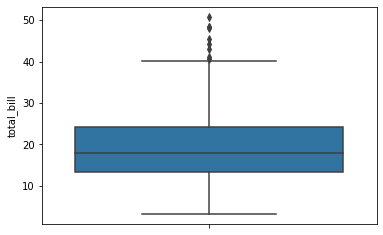

In [51]:
import matplotlib.pyplot as plt

sns.boxplot(y='total_bill', data=tips)
plt.show()

In [52]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*   숫자형 데이터: 기술 통계량(descriptive statistics)으로 요약 - 평균, 표준편차, 중앙값, 최솟값, 최댓값, ....
*   범주형 데이터: 빈도수 요약

In [53]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

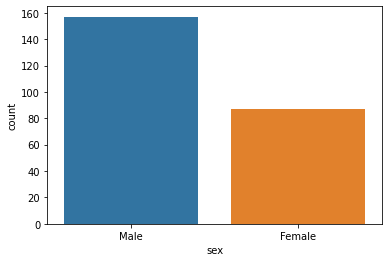

In [56]:
sns.countplot(x='sex', data=tips)
plt.show()

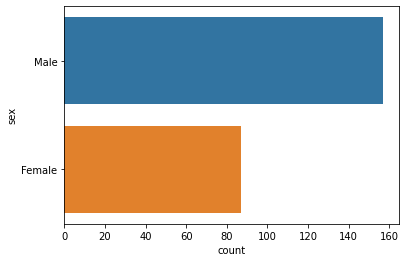

In [59]:
sns.countplot(y='sex', data=tips)

plt.savefig('sex.png')  # 그래프를 이미지로 저장.

plt.show()

In [54]:
# smoker 컬럼의 빈도수
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [60]:
# tips DF에서 day 컬럼의 값들과 그 빈도수
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

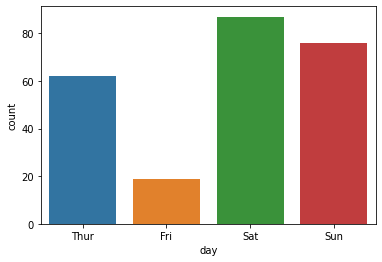

In [61]:
sns.countplot(x='day', data=tips)
plt.show()

In [64]:
# 일요일의 tip의 평균
# 1) day == 'Sun' 레코드들을 찾음
sunday = tips[tips['day'] == 'Sun']
sunday

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [65]:
# 2) 위에 찾은 부분집합에서 tip 컬럼의 평균
sunday['tip'].mean()

3.255131578947369

In [66]:
tips[tips['day'] == 'Sun']['tip'].mean()

3.255131578947369

In [71]:
# 토요일 tip의 평균
# tips[tips['day'] == 'Sat']['tip'].mean()

saturday = tips[tips['day'] == 'Sat']
saturday['tip'].mean()

2.993103448275862

In [74]:
# 성별 tip의 평균: 남성의 tip 평균, 여성의 tip 평균
tips[tips['sex'] == 'Male']['tip'].mean()

3.0896178343949052

In [76]:
tips[tips['sex'] == 'Female']['tip'].mean()

2.833448275862069

In [79]:
# 일요일에 식사한 여성 손님의 total_bill의 평균
tips[(tips['day'] == 'Sun') & (tips['sex'] == 'Female')]['total_bill'].mean()

19.87222222222222

In [81]:
# 일요일에 식사한 남성 손님의 total_bill의 평균
tips[(tips['day'] == 'Sun') & (tips['sex'] == 'Male')]['total_bill'].mean()

21.887241379310346

In [86]:
sub1 = tips[tips['day'] == 'Sun']
sub2 = sub1[sub1['sex'] == 'Male']
sub2['total_bill'].mean()

21.887241379310346

In [89]:
# tips DF에서 일요일에 식사한 여성 비흡연자의 total_bill의 평균, 최댓값
subset = tips[(tips['day'] == 'Sun') &
              (tips['sex'] == 'Female') &
              (tips['smoker'] == 'No')]
subset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
18,16.97,3.50,Female,No,Sun,Dinner,3
51,10.29,2.60,Female,No,Sun,Dinner,2
52,34.81,5.20,Female,No,Sun,Dinner,4
114,25.71,4.00,Female,No,Sun,Dinner,3
115,17.31,3.50,Female,No,Sun,Dinner,2


In [91]:
print('평균:', subset['total_bill'].mean())
print('최댓값:', subset['total_bill'].max())

평균: 20.82428571428571
최댓값: 35.26
